In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#reading file
data = pd.read_csv("heart.csv") 

In [8]:
#finding the first 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#Extracting only 5th column
data_5=data.iloc[:,4] 
data_5.head()

0    233
1    250
2    204
3    236
4    354
Name: chol, dtype: int64

In [12]:
#Extracting the 15th column
data15=data.iloc[:,13] 
data15.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [13]:
#finding the shape of the dataset inorder to know the number of rows and columns
data.shape

(303, 14)

In [14]:
#'Extracting the data to know how many males have heart desease
male_patients=data[(data['sex']==1) & (data['target']==1)]
male_patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [20]:
#total of 93 males have heart desease wrt our dataset
male_patients.shape

(93, 14)

In [21]:
#'Extracting the data to know how many females have heart desease
female_patients=data[(data['sex']==0) & (data['target']==1)]
female_patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [22]:
##total of 93 females have heart desease wrt our dataset
female_patients.shape

(72, 14)

In [25]:
# checking the total number of male and females in the dataset 
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [27]:
#Extracting 100 random records
randdata=data.sample(n=100)
randdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0


In [28]:
len(randdata)

100

In [30]:
# checking the total number of patiens with and without heart desease 
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
#-----------------------------data cleaning-----------------------------#

In [32]:
#checking for the null values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#-------------------------------Data Visualization------------------#

In [53]:
%matplotlib inline
import seaborn as sns

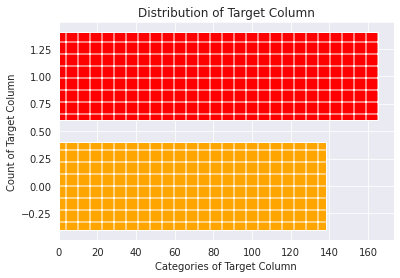

In [64]:
#bar-plot for 'Target' column
sns.set_style("darkgrid")
plt.barh(data['target'].value_counts().keys().tolist(),data['target'].value_counts().tolist(),color=['red','orange'],hatch='+')
plt.xlabel('Categories of Target Column')
plt.ylabel('Count of Target Column')
plt.title('Distribution of Target Column')
plt.show()

Text(0.5, 1.0, 'Distribution of tenure')

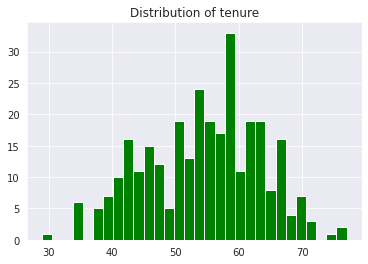

In [61]:
#histogram for 'age' column
sns.set_style("darkgrid")
plt.hist(data['age'],color='green',bins=30)
plt.title('Distribution of age')

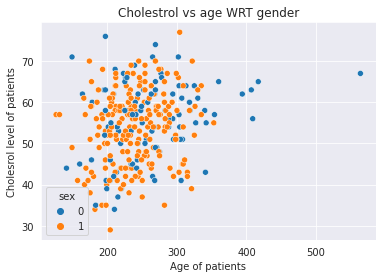

In [157]:
#scatterplot 
sns.scatterplot(data=data,x='chol',y='age',hue='sex')
plt.xlabel('Age of patients')
plt.ylabel('Cholesrol level of patients')
plt.title('Cholestrol vs age WRT gender')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


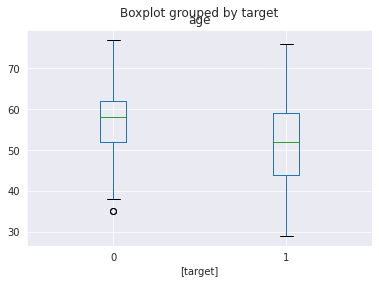

In [86]:
#Box-plot
data.boxplot(column='age',by=['target'])
plt.show()

In [ ]:
#-----------------------Linear Regresssion----------------------

In [147]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [148]:
x=pd.DataFrame(data.iloc[:, :-1])
y=pd.DataFrame(data['target'])

In [149]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [150]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [152]:
#building the model
from sklearn.linear_model import LinearRegression
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train,y_train)

LinearRegression()

In [153]:
#predicting the values
y_pred = simpleLinearRegression.predict(x_test)

In [154]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

0.3768499202580637

In [120]:
#----------------------------------Logistic Regression-------------------------------

In [122]:

x=pd.DataFrame(data.iloc[:, :-1])
y=pd.DataFrame(data['target'])

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65,random_state=0)

In [124]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [125]:
y_pred = logmodel.predict(x_test)

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test),accuracy_score(y_pred,y_test)

(array([[39,  5],
        [14, 49]]), 0.822429906542056)

In [ ]:
#--------------Multiple logistic regression-------------------

In [127]:
x=pd.DataFrame(data.iloc[:, :-1])
y=pd.DataFrame(data['target'])

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [129]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [130]:
y_pred = logmodel.predict(x_test)

In [131]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [132]:
#---------------decision tree---------------

In [134]:
x=pd.DataFrame(data.iloc[:, :-1])
y=pd.DataFrame(data['target'])

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [136]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier()

In [137]:
y_pred = classifier.predict(x_test)  

In [138]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))   
print(accuracy_score(y_test, y_pred))  

[[23  6]
 [ 1 31]]
0.8852459016393442


In [139]:
#--------------random forest---------------------

In [142]:
x=pd.DataFrame(data.iloc[:, :-1])
y=pd.DataFrame(data['target'])

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [144]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [145]:
y_pred=clf.predict(x_test)

In [146]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7868852459016393
